<a href="https://colab.research.google.com/github/Harshini-Manchala/NLP_Lab/blob/main/NLP_lab2_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# import re

# pattern = re.compile(r'^[a-z]+$')  # one or more lowercase letters only

# def check_word(s: str) -> str:
#     # s is used as-is (do NOT strip); spaces should make it invalid
#     return "Accepted" if pattern.fullmatch(s) else "Not Accepted"

# tests = ["cat", "dog", "a", "zebra", "dog1", "1dog", "DogHouse", "Dog_house", " cats"]

# for t in tests:
#     print(f"'{t}': {check_word(t)}")


'cat': Accepted
'dog': Accepted
'a': Accepted
'zebra': Accepted
'dog1': Not Accepted
'1dog': Not Accepted
'DogHouse': Not Accepted
'Dog_house': Not Accepted
' cats': Not Accepted


In [13]:
pip install automathon

In [14]:
from automathon import DFA

# Define DFA components
states = {'q0', 'q1', 'qdead'}
# Redefine alphabet to only include lowercase letters
alphabet = set('abcdefghijklmnopqrstuvwxyz')

# Transition function: dictionary of dictionaries
transition_function = {
    'q0': {ch: 'q1' for ch in alphabet},
    'q1': {ch: 'q1' for ch in alphabet},
    'qdead': {}, # No transitions from qdead defined explicitly
}

# Start & accept states
start_state = 'q0'
accept_states = {'q1'}

# Create DFA
dfa = DFA(states, alphabet, transition_function, start_state, accept_states)

# Test examples - these tests might behave differently now as 'dog1' and ' cats' contain characters not in the alphabet
for word in ["cat", "dog1", "zebra", " cats"]:
    print(f"{word}: {'Accepted' if dfa.accept(word) else 'Not Accepted'}")

# Visualize DFA
dfa.view("dfa_diagram")  # will create dfa_diagram.png

cat: Accepted
dog1: Not Accepted
zebra: Accepted
 cats: Not Accepted


cat: Accepted
Transition table for 'cat':
| Step | Current State | Input Symbol | New State |
|------|--------------|--------------|-----------|
| 1    | q0           | c          | q1        |
| 2    | q1           | a          | q1        |
| 3    | q1           | t          | q1        |

Final State: q1
Result: Accepted
dog1: Not Accepted
Transition table for 'dog1':
| Step | Current State | Input Symbol | New State |
|------|--------------|--------------|-----------|
| 1    | q0           | d          | q1        |
| 2    | q1           | o          | q1        |
| 3    | q1           | g          | q1        |
| 4    | q1           | OTHER          | qdead        |

Final State: qdead
Result: Not Accepted
zebra: Accepted
Transition table for 'zebra':
| Step | Current State | Input Symbol | New State |
|------|--------------|--------------|-----------|
| 1    | q0           | z          | q1        |
| 2    | q1           | e          | q1        |
| 3    | q1           | b       

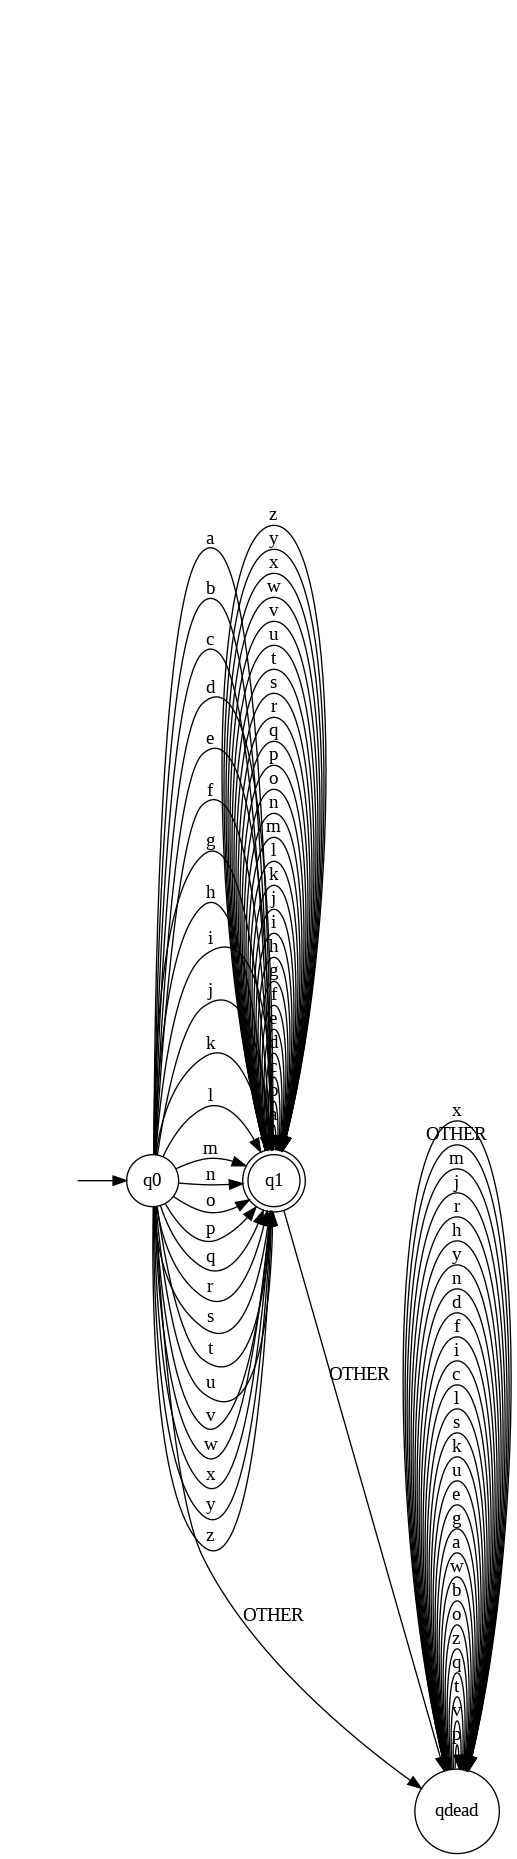

In [15]:
from automathon import DFA
import string

# Define DFA states
states = {'q0', 'q1', 'qdead'}

# Alphabet = lowercase + one placeholder for invalid chars
alphabet = set(string.ascii_lowercase) | {"OTHER"}

# Transition function
transition_function = {
    'q0': {**{ch: 'q1' for ch in string.ascii_lowercase}, "OTHER": 'qdead'},
    'q1': {**{ch: 'q1' for ch in string.ascii_lowercase}, "OTHER": 'qdead'},
    'qdead': {ch: 'qdead' for ch in alphabet}
}


# Start and accept states
start_state = 'q0'
accept_states = {'q1'}

# Create DFA
dfa = DFA(states, alphabet, transition_function, start_state, accept_states)

# Helper: map any char to 'OTHER' if not lowercase
def map_input(word):
    return [ch if ch in string.ascii_lowercase else "OTHER" for ch in word]



def transition_trace(word):
    current_state = start_state
    table = []
    for symbol in map_input(word):  # map invalid chars to "OTHER"
        new_state = transition_function[current_state][symbol]
        table.append((current_state, symbol, new_state))
        current_state = new_state
    return table, current_state

# Test examples
for word in ["cat", "dog1", "zebra", "cats","23okay","iWill"]:
    mapped_word = map_input(word)
    print(f"{word}: {'Accepted' if dfa.accept(mapped_word) else 'Not Accepted'}")
    trace, final_state = transition_trace(word)

    print(f"Transition table for '{word}':")
    print("| Step | Current State | Input Symbol | New State |")
    print("|------|--------------|--------------|-----------|")
    for i, (cur, sym, new) in enumerate(trace, start=1):
        print(f"| {i}    | {cur}           | {sym}          | {new}        |")

    print("\nFinal State:", final_state)
    print("Result:", "Accepted" if final_state in accept_states else "Not Accepted")


dfa.view("dfa_diagram")
from IPython.display import Image
Image(filename="dfa_diagram.gv.png")

